In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import os

# os.chdir(path='/DATA')

In [2]:
#Load the raw data using pandas
raw_data = pd.read_csv('DATA/predictive_maintenance.csv')

In [3]:
raw_data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
raw_data.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [7]:
raw_data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [8]:
raw_data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# EDA 


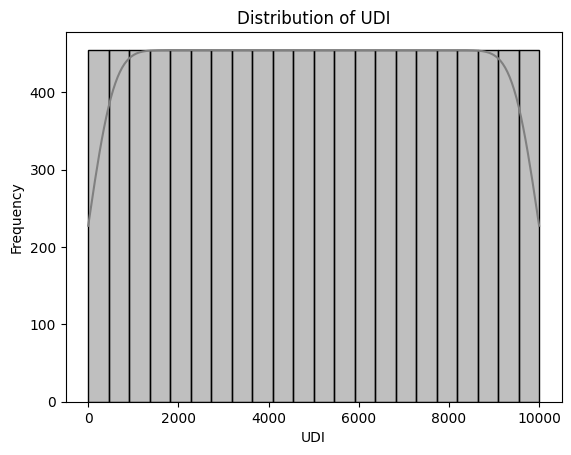

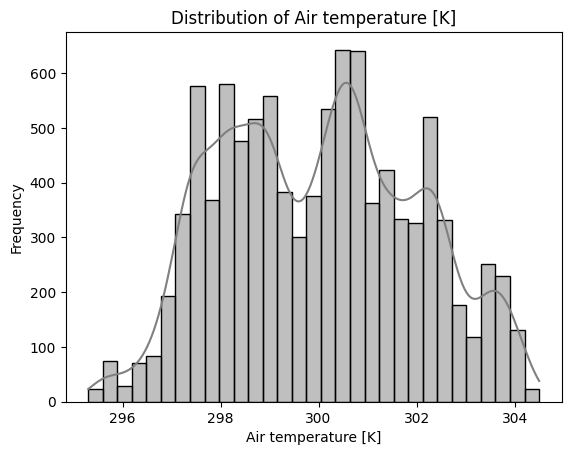

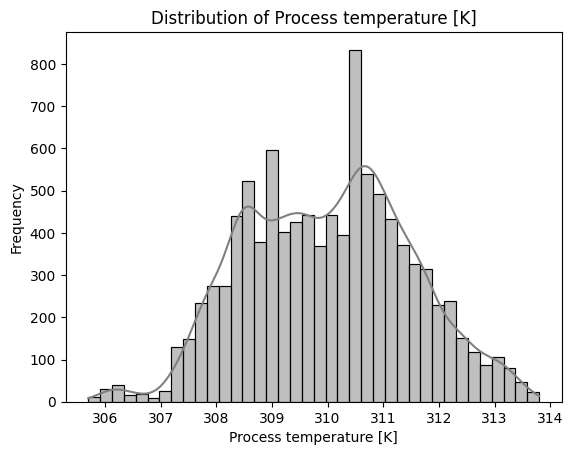

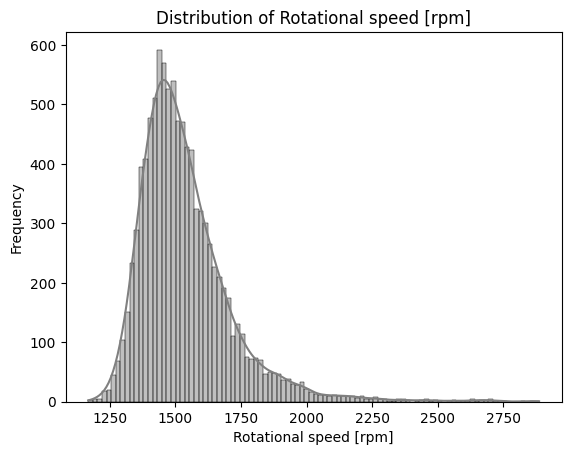

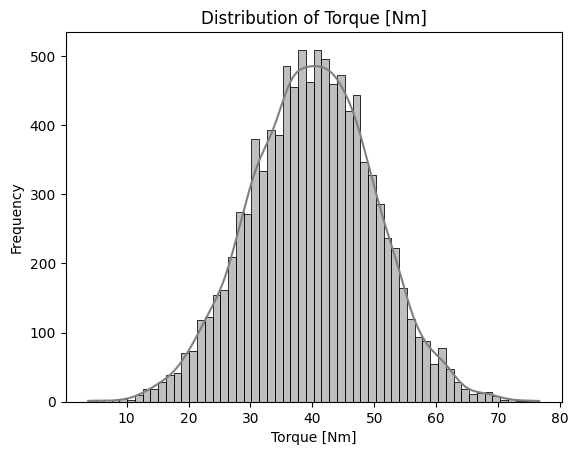

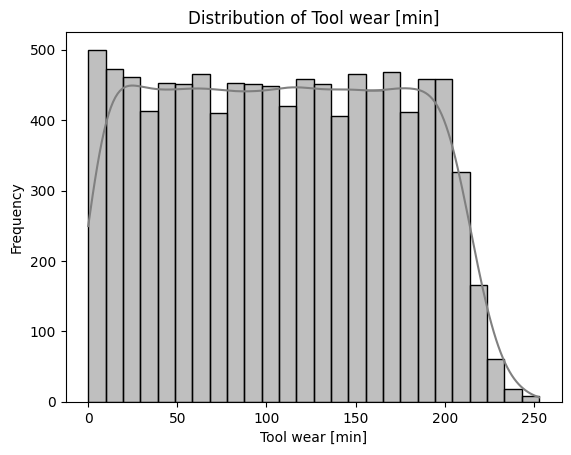

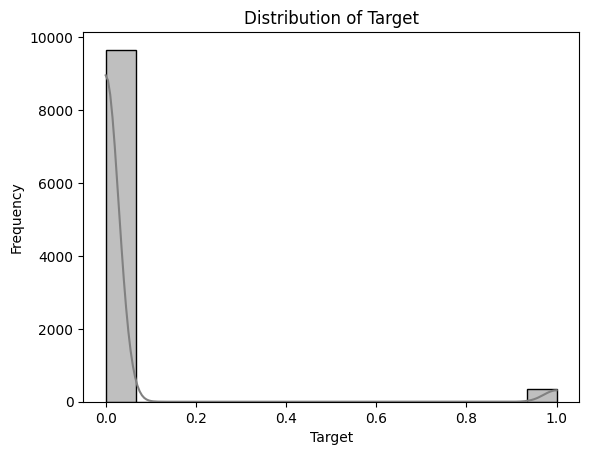

In [9]:
# Loop through numerical columns and plot histograms
for col in raw_data.select_dtypes(exclude='object').columns:
    sns.histplot(data=raw_data, x=col, kde=True, color='grey')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\91845\AppData\Local\Temp\ipykernel_32612\2817789164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_data.corr()# Compute the correlation matrix


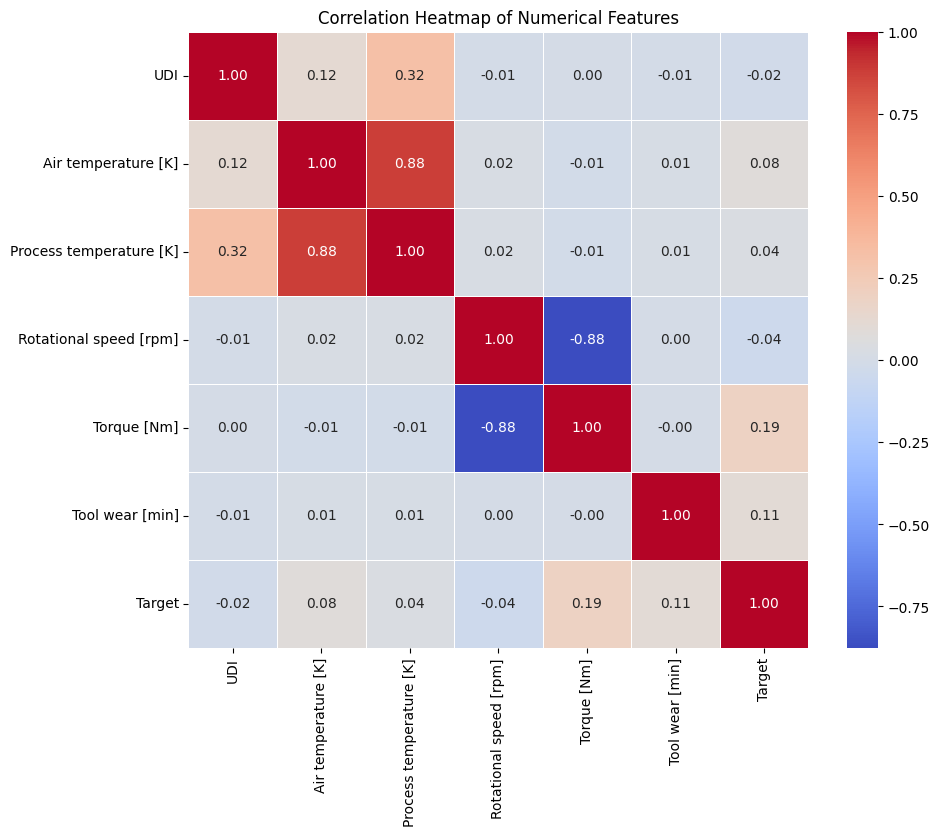

In [10]:
raw_data.corr()# Compute the correlation matrix
corr_matrix = raw_data.select_dtypes(exclude='object').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Handling Categorical data

In [11]:
raw_data.select_dtypes(include='object')

Product ID Type Failure Type
0        M14860    M   No Failure
1        L47181    L   No Failure
2        L47182    L   No Failure
3        L47183    L   No Failure
4        L47184    L   No Failure
...         ...  ...          ...
9995     M24855    M   No Failure
9996     H39410    H   No Failure
9997     M24857    M   No Failure
9998     H39412    H   No Failure
9999     M24859    M   No Failure

[10000 rows x 3 columns]

In [12]:
raw_data.select_dtypes(include='object').nunique()

Product ID      10000
Type                3
Failure Type        6
dtype: int64

In [4]:
raw_data['Type'] = raw_data['Type'].map({'H':2, 'M':1, 'L':0})

In [5]:
raw_data['Failure Type'].unique()

# Perform One-Hot Encoding
one_hot_encoded = pd.get_dummies(raw_data['Failure Type'])

# Concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([raw_data.drop(columns='Failure Type'), one_hot_encoded], axis=1)

In [6]:
data_encoded


UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860     1                298.1                    308.6   
1         2     L47181     0                298.2                    308.7   
2         3     L47182     0                298.1                    308.5   
3         4     L47183     0                298.2                    308.6   
4         5     L47184     0                298.2                    308.7   
...     ...        ...   ...                  ...                      ...   
9995   9996     M24855     1                298.8                    308.4   
9996   9997     H39410     2                298.9                    308.4   
9997   9998     M24857     1                299.0                    308.6   
9998   9999     H39412     2                299.0                    308.7   
9999  10000     M24859     1                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

      Heat Dissipation Failure  No Failure  Overstrain Failure  Power Failure  \
0                            0           1                   0              0   
1                            0           1                   0              0   
2                            0           1                   0              0   
3                            0           1                   0              0   
4                            0           1                   0              0   
...                        ...         ...                 ...            ...   
9995                         0           1                   0              0   
9996                         0           1                   0              0   
9997                         0           1                   0              0   
9998                         0           1                   0              0   
9999                         0           1                   0              0   

      Random Failures  Tool Wear Failure  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0                  0  
4                   0                  0  
...               ...                ...  
9995                0                  0  
9996                0                  0  
9997                0                  0  
9998                0                  0  
9999                0                  0  

[10000 rows x 15 columns]

# Some basic Questions

## 1. What is the overall distribution of failures among different failure types?


In [15]:
Failur_type  = raw_data['Failure Type'].value_counts().to_frame().reset_index()

import plotly.graph_objs as go

# Create a Plotly bar chart
fig = go.Figure(data=[go.Bar(x=Failur_type['index'], y=Failur_type['Failure Type'])])

# Update layout
fig.update_layout(xaxis_title='Categories',
                  yaxis_title='Values',
                  title='Bar Chart of Values by Category')

# Show the plot
fig.show()

# 2. How does the air temperature vary across different types of failures?

In [16]:
raw_data['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

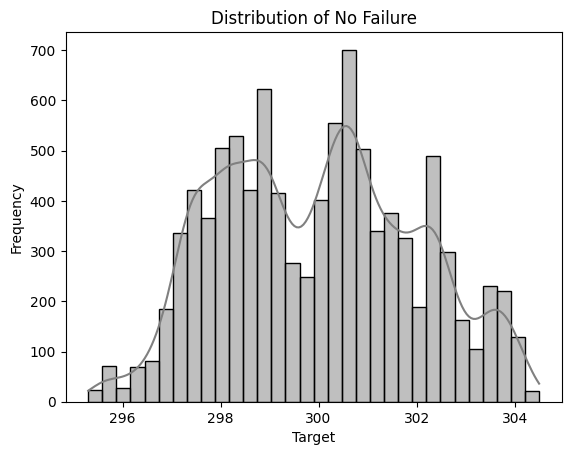

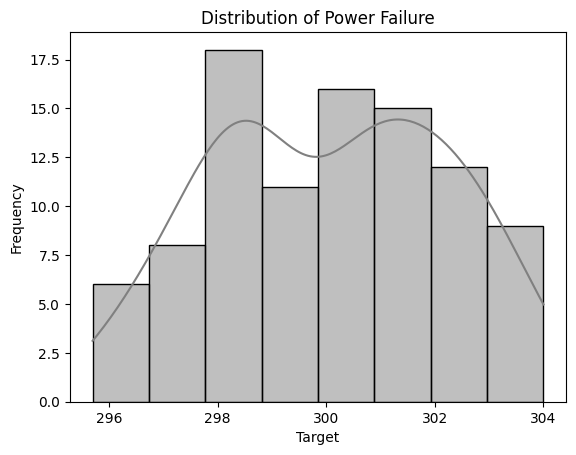

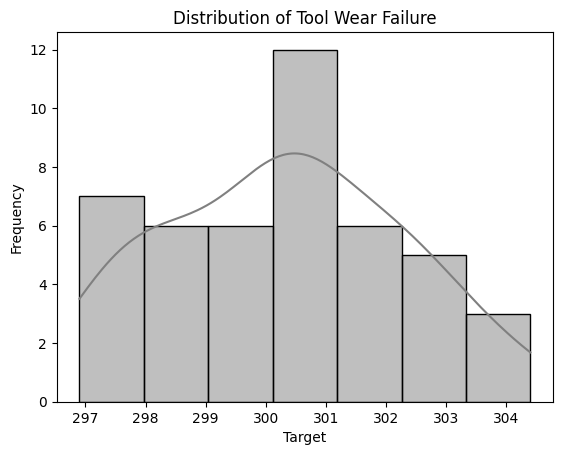

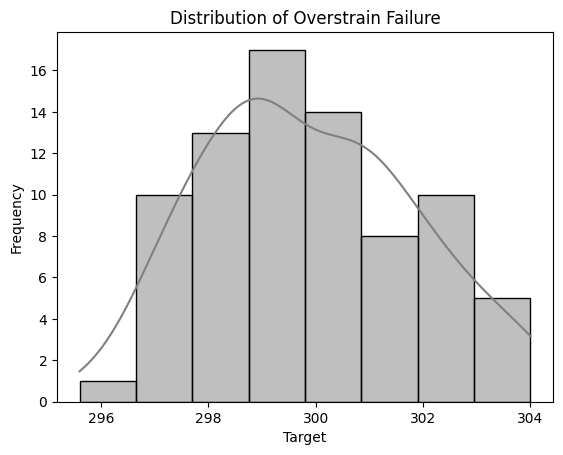

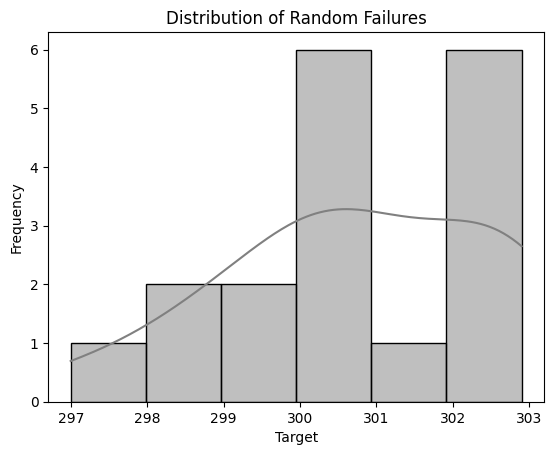

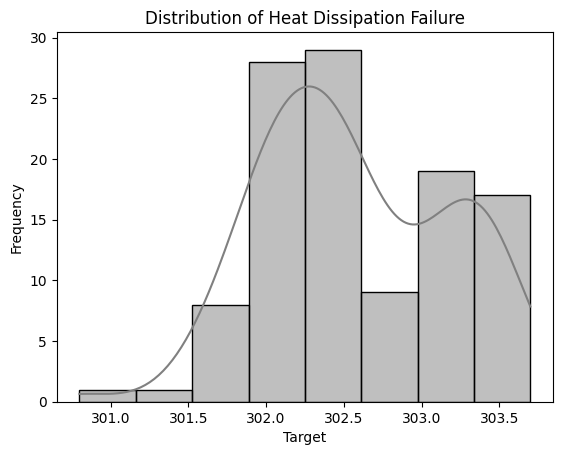

In [17]:
FailureType = ['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure']
for ty in  FailureType:
    temp_data = raw_data[raw_data['Failure Type']==ty]

    sns.histplot(data=temp_data, x='Air temperature [K]', kde=True, color='grey')
    plt.title(f'Distribution of {ty}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

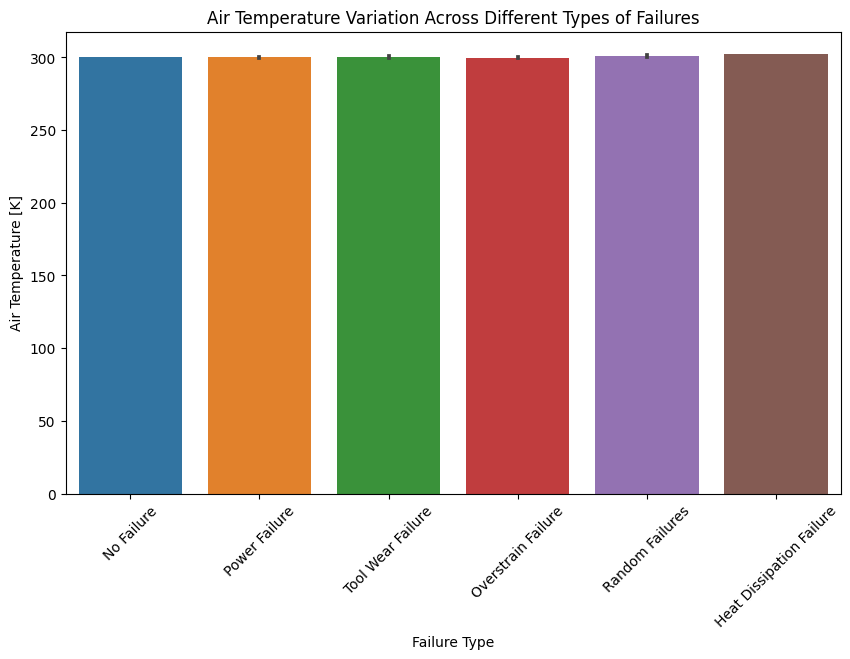

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Failure Type', y='Air temperature [K]', data=raw_data)
plt.xlabel('Failure Type')
plt.ylabel('Air Temperature [K]')
plt.title('Air Temperature Variation Across Different Types of Failures')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

# 3. Is there any noticeable relationship between process temperature and failure occurrence?

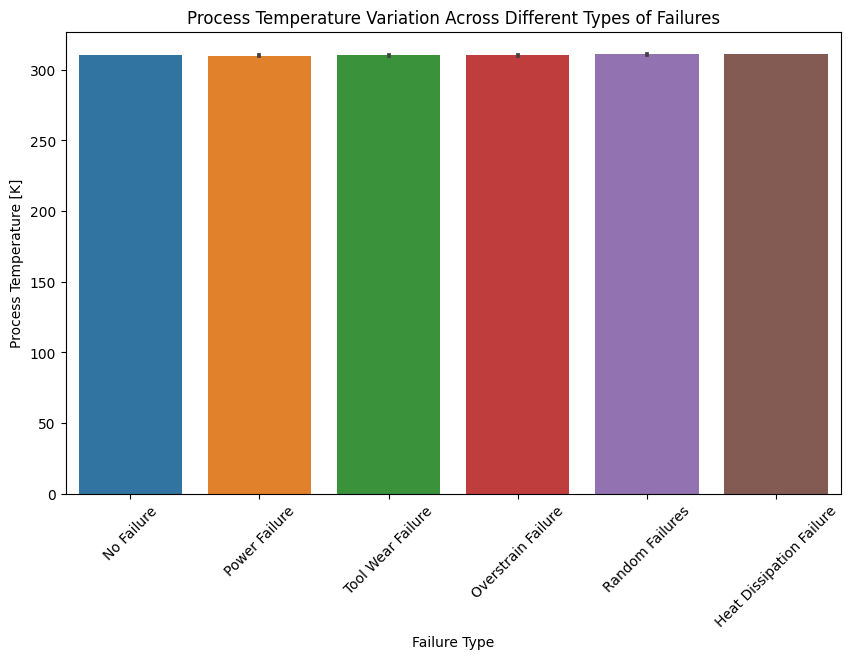

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Failure Type', y='Process temperature [K]', data=raw_data)
plt.xlabel('Failure Type')
plt.ylabel('Process Temperature [K]')
plt.title('Process Temperature Variation Across Different Types of Failures')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

# 4. What is the typical range of rotational speed for products experiencing failures?

In [20]:
import plotly.express as px

# Filter data for products experiencing failures
failed_products = raw_data[raw_data['Failure Type'] != 'No Failure']

# Create a box plot with Plotly Express
fig = px.box(failed_products, x='Failure Type', y='Rotational speed [rpm]',
             title='Typical Range of Rotational Speed for Products Experiencing Failures',
             labels={'Rotational speed [rpm]': 'Rotational Speed [rpm]', 'Failure Type': 'Failure Type'})

# Rotate x-axis labels for better readability
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()

# 5. How does torque vary for products with and without failures?

In [21]:
import plotly.express as px


# Create a box plot with Plotly Express
fig = px.box(raw_data, x='Failure Type', y='Torque [Nm]',
             title='Torque Variation for Products with and Without Failures',
             labels={'Torque [Nm]': 'Torque [Nm]', 'Failure Type': 'Failure Type'})

# Rotate x-axis labels for better readability
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()

# 6. What is the distribution of tool wear for products with different failure types?

In [22]:
# Filter data for products experiencing failures
failed_products = raw_data[raw_data['Failure Type'] != 'No Failure']

# Create a box plot with Plotly Express
fig = px.violin(failed_products, x='Failure Type', y='Tool wear [min]',
             title='Distribution of Tool Wear for Products with Different Failure Types',
             labels={'Tool wear [min]': 'Tool wear [min]', 'Failure Type': 'Failure Type'})

# Rotate x-axis labels for better readability
fig.update_layout(xaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()

# 7. Is there any correlation between tool wear duration and the occurrence of specific failure types?


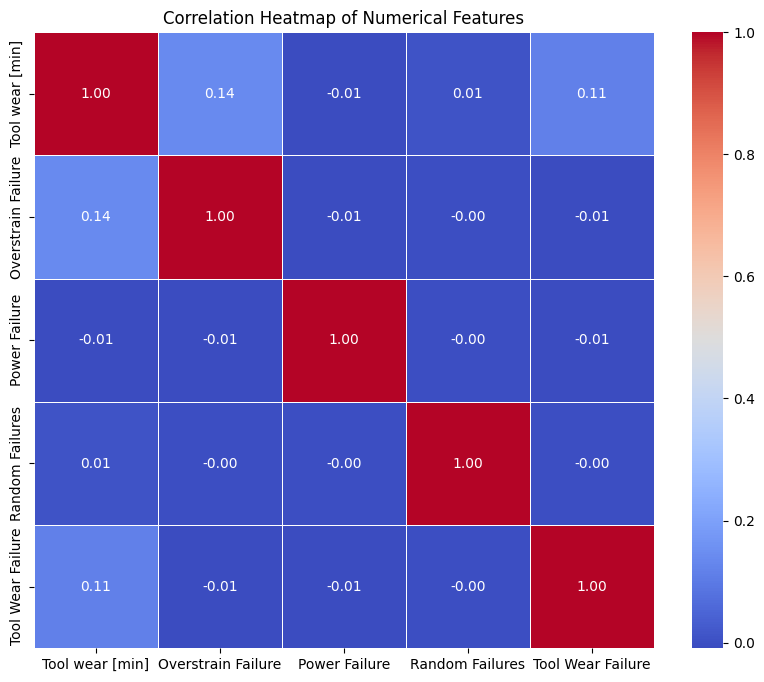

In [23]:
corr_matrix = data_encoded[['Tool wear [min]','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure']].corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 8. What is the average duration between tool wear and failure occurrence for each failure type?


In [24]:
mean_tool_wear_duration = raw_data.groupby('Failure Type')['Tool wear [min]'].mean()

print(mean_tool_wear_duration)

Failure Type
Heat Dissipation Failure    107.339286
No Failure                  106.678927
Overstrain Failure          208.217949
Power Failure               101.884211
Random Failures             119.888889
Tool Wear Failure           216.555556
Name: Tool wear [min], dtype: float64


# User Can e identify any outliers in the data that might indicate unusual operating condition ?

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

# Create box plots for numerical columns to identify outliers
fig = go.Figure()

# Iterate over numerical columns and add box plots to the figure
for column in raw_data.select_dtypes(include='number').columns:
    fig.add_trace(go.Box(y=raw_data[column], name=column))

# Update layout
fig.update_layout(title='Box Plot of Numerical Columns',
                  xaxis=dict(title='Columns'),
                  yaxis=dict(title='Values'))

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()


# How do different process parameters interact to influence the occurrence of failures?


In [ ]:
# Select process parameters and failure type columns
process_parameters = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
failure_type = 'Failure Type'

# Combine process parameters and failure type into a single DataFrame
combined_data = raw_data[process_parameters + [failure_type]]

# Create pair plot
sns.pairplot(combined_data, hue=failure_type)
plt.show()

# Handling imblanced data

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X = data_encoded.drop(['Target'],axis=1)
y = data_encoded['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling with SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
print(pd.Series(y_train_resampled).value_counts())


0    7722
1    7722
Name: Target, dtype: int64


In [52]:
# Convert the resampled arrays back to DataFrames
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
y_train_resampled_df = pd.DataFrame(y_train_resampled)

# Concatenate the resampled features and labels
train_data = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [57]:
# Save train_data as CSV
train_data.to_csv('train_data.csv', index=False)

# Save test_data as CSV
test_data.to_csv('test_data.csv', index=False)

# Data Type 2 for finding Failure  Type

In [60]:
raw_data.drop(['UDI','Product ID','Target'],axis=1,inplace=True)

In [65]:
label_mapping = {
    'No Failure': 0,
    'Power Failure': 1,
    'Tool Wear Failure': 2,
    'Overstrain Failure': 3,
    'Random Failures': 4,
    'Heat Dissipation Failure': 5
}


raw_data['Failure Type'] = raw_data['Failure Type'].map(label_mapping)



In [ ]:
raw_data.drop(['UDI','Product ID'],axis=1,inplace=True)

In [ ]:
raw_data.to_csv('TPreprocessedData.csv',index=False)